<a href="https://colab.research.google.com/github/eliholton7/Ev288/blob/main/code/import-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/dmhuehol/ev228-analysis-environmental-data/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/dmhuehol/ev228-analysis-environmental-data/blob/main/code/import-data.ipynb)  
*This code is made available under an MIT License, included as the LICENSE file in this repository.*

This notebook walks through the process of writing code to import data into
Python using weather station data from the Colorado Springs weather station.

# 1. Importing the data

Now we have the data on our computer and are ready to import it into a Python
data structure. To begin, we need to import relevant package(s).

In [84]:
# Import relevant packages based on class discussion here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we make variables that contain the path (location) of our data. File
paths are input as strings. In general, it's best to keep the path and the
filename separate as this allows us to import multiple files more easily. This
is not relevant for this script, but builds good habits for the future!


In [85]:
#  Make a variable with the path to your folder and another variable with the
#  filename here.
path_data = '/Users/[eliholton]/Ev228_data/'
file_name = 'COS-Airport_maxT-minT-precip-snow_194801-202212.csv'

We are now ready to import the data into Python!

In [86]:
#  Write the command to import your data here
df = pd.read_csv(file_name)

Now we are ready to look at the data!

# 2. Looking at the data

Once we input a new dataset, we first want to isolate the variable(s) we're
interested in. Then, we usually run some basic tests to get a feel for whether
the data has been imported correctly, if there are clear issues (e.g., large
missing chunks of data, discontinuities, etc.), or any immediately interesting
characteristics (such as if we had a hypothesis in mind for a dataset when we
started). These tests generally involve making very simple plots that allow us
to check a characteristic we know about the data as well as calculating
descriptive statistics.

This whole process is the simplest form of *exploratory data analysis*, which
we'll spend much of this week on.

## 2a. Data Variables

The first thing to do is to print the dataset. This will show us each of the
data variables with a snippet of the data that they contain.

In [87]:
#  Print your data variable to the console here
print(df)

    Year_Month maximumT minimumT precipitation snowfall
0        Units     degF     degF            in       in
1      1948-01      NaN      NaN           NaN      NaN
2      1948-02      NaN      NaN           NaN      NaN
3      1948-03      NaN      NaN           NaN      NaN
4      1948-04     63.6     35.7          1.07        4
..         ...      ...      ...           ...      ...
896    2022-08     85.1     58.4          1.82        0
897    2022-09     82.1     51.7           0.5        0
898    2022-10     66.6     38.2          0.15        T
899    2022-11     50.3     22.9          0.24      7.4
900    2022-12     45.1     16.2           0.5      3.9

[901 rows x 5 columns]


**QUESTION: There are five variables in this dataset. What are they? What do
you think each of the variables represent?**  
**QUESTION: Most of the data entries are numeric, but some are marked NaN and
others T. What do you think NaN represents? How about T?**

For the rest of this notebook, we will emphasize the `maximumT` variable.
Variables are extracted from a dataframe using bracket notation, i.e., for a
dataframe named `df` with a variable `var`, you would extract the variable with
the command `df[var]`.

Extract `maximumT` and `Year_Month` from the dataframe and assign them each to
separate variables below.

In [105]:
# Extract maximumT and Year_Month and assign them to variables here.
max_temp = df['maximumT'][1:]
dates = df['Year_Month'][1:]


**ACTIVITY: For a one-dimensional structure like this one, bracket notation is
also how we access individual values within the variable. For practice, print
the value of the element at index 4 and at index 823. You should obtain `'63.6'`
and `'89.3'`, respectively.**  

The first line of the data is a *header* which describes the data, but does not
contain data. This header needs to be dropped before carrying out further
operations.

**ACTIVITY: A colon `:` can be used to select a range of indices using bracket
notation. (e.g., `df[9:12]` would select the 9th, 10th, and 11th indices). Use
bracket notation to remove the header by selecting all of the elements except
for the first one.**

In [106]:
#  Print the value of the element at index 4 and at index 823
#  Then, use bracket notation to remove the header
print(max_temp[4])
print(max_temp[823])
print(df.iloc[0])

63.6
89.3
Year_Month       Units
maximumT          degF
minimumT          degF
precipitation       in
snowfall            in
Name: 0, dtype: object


There's one odd thing about this data that you may have already noticed--the
values you are obtaining are strings, not floats as you may expect. This means
we have to carry out an extra conversion step before doing anything else to the
data, as strings are not directly plottable. The choice to represent the data
as strings may seem silly, but there is a very good reason for it!

**ACTIVITY: Verify that the data contained in this dataframe consists of
strings. Hint: Try using the `type` function for this.**  
**QUESTION: Why do you think this data is represented as a string by default?**

In [107]:
#  The code below converts the strings into floats, assuming that the variable
#  with the maximum temperature data is named max_temp. Edit as needed to make
#  this work with your variable!
type(max_temp[4])
print(type(max_temp[4]))
max_temp = pd.to_numeric(max_temp, errors='coerce').astype(np.float16)


<class 'str'>


**ACTIVITY: Verify that the data now consists of floats.**  

We need to convert the dates into a special format called a *datetime* which
represents dates.

In [108]:
#  The code below converts the strings into datetimes, assuming that the
#  variable with the maximum temperature data is named dates. Edit as needed to
#  make this work with your variable!
dates = pd.to_datetime(dates)
print(dates)

1     1948-01-01
2     1948-02-01
3     1948-03-01
4     1948-04-01
5     1948-05-01
         ...    
896   2022-08-01
897   2022-09-01
898   2022-10-01
899   2022-11-01
900   2022-12-01
Name: Year_Month, Length: 900, dtype: datetime64[ns]


# 2b. Plot the record

Often the first test we run on a new dataset is to plot the whole dataset. This
allows us to immediately conduct a *plausibility check* on the data:
essentially, does something look wildly off, or can we proceed further?

For these first plots, do not set any x- or y-limits. At this exploratory
stage, it's important to see all of the data--often something that exceeds your
expected limits for the data is the sign of something that needs further
investigation!

**QUESTION: Before plotting the data, ask yourself 1) What range of temperature
values in Fahrenheit might you expect to see for Colorado Springs? 2) Keeping
in mind this is monthly data, what overall patterns might you expect to see
over the course of the record?**

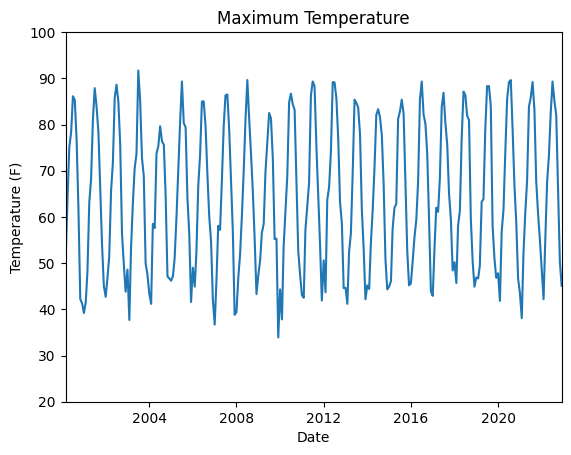

In [133]:
#  Make a figure and plot the maximumT data that you assigned to a variable in
#  the previous cell. Feel free to copy and paste code from previous notebooks
#  (such as statistical_moments) where we made figures.
plt.figure()
plt.plot(dates, max_temp)
plt.title('Maximum Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.xlim(dates[627], dates[900])
plt.ylim(20, 100)
plt.show()

**QUESTION: Does this range of values look plausible? Do you see the feature(s)
you expected to see? Is there anything unexpected?**

**ACTIVITY: Zoom in on a smaller range of the data (i.e., a few years). You may
do this either by changing the x-limits or by selecting a smaller range of the
data using bracket notation.**

# 2c. Descriptive statistics

Another good way to test a new dataset is by calculating descriptive statistics
on it.

**ACTIVITY: Add code below to create a dictionary containing the mean, median,
and standard deviation of the dataset. Print the dictionary to the console.**

**STRETCH: You may also add skewness and kurtosis to this analysis. (They're
actually extremely interesting for each of the variables in this dataset!)
However, higher moments are not typically checked as part of initial
exploratory analysis.**

In [67]:
#  Create your dictionary with descriptive statistics for the dataset
dictionary = {'mean': np.mean(max_temp), 'median': np.median(max_temp), 'std': np.std(max_temp),}
print(dictionary)

{'mean': np.float16(62.72), 'median': np.float16(nan), 'std': np.float16(15.59)}


It is likely that many of your values are returning nans! This is because most
statistical functions report nan as the output if ANY of the values in the
input variable are nan. There are special versions or inputs for each of the
functions that currently return nan that allow a number to be returned by
omitting nans from the calculation.

**ACTIVITY: Look up the version of the median function in Numpy that works with
nans. Implement this in your dictionary.**


In [68]:
#  Implement the version of the median function that allows nans
dictionary = {'mean': np.mean(max_temp), 'median': np.nanmedian(max_temp), 'std': np.std(max_temp),}
print(dictionary)

{'mean': np.float16(62.72), 'median': np.float16(62.5), 'std': np.float16(15.59)}


When working with real-world data, we usually check the maximum and minimum of
the data in addition to the descriptive statistics we have already added.

**ACTIVITY: Look up the functions in Numpy to calculate the maximum and minimum
of the dataset. Implement these in your dictionary, as well.**

In [111]:
#  Add maximum and minimum to your dictionary
dictionary = {'mean': np.mean(max_temp), 'median': np.nanmedian(max_temp), 'std': np.std(max_temp), 'max': np.max(max_temp), 'min': np.min(max_temp)}
print(dictionary)

{'mean': np.float16(62.72), 'median': np.float16(62.5), 'std': np.float16(15.59), 'max': np.float16(91.7), 'min': np.float16(27.2)}


You have now completed a basic exploratory analysis of a dataset!

**ACTIVITY: Try to summarize what you now know about the dataset in 2-3
sentences of natural language.**

This kind of exploratory data analysis--opening an unfamiliar dataset and
getting a feel for how it works by making simple plots and calculating
descriptive statistics--is one of the core skills of environmental data
science!

**ACTIVITY: Now, choose a different variable and repeat your exploratory analysis.**

This also begins to segue us into moving towards *modularity* and writing in
functions as opposed to scripting as with these notebooks. Changing the
analysis in a script involves changing the whole script; with a modular
approach, we would only need to change one input!